## What are `sklearn` Pipelines?

Pipelines are a way to streamline and simplify the workflow for creating machine learning models. They allow you to chain together multiple steps involved in data preprocessing and model training into a single, cohesive workflow.

#### Key Components of a Pipeline:

1. **Transformers**: These are steps in the pipeline that preprocess the data. They include tasks such as scaling, normalization, encoding categorical variables, and other feature engineering steps.
2. **Estimators**: These are the final step in the pipeline, which typically involve training a machine learning model (e.g., regression, classification).

#### Why Use Pipelines?

1. **Modularity**: Pipelines allow you to break down your workflow into modular steps, making your code cleaner and easier to manage.
2. **Reproducibility**: By encapsulating the entire process into a single object, you ensure that the exact same preprocessing and modeling steps are applied every time, improving reproducibility.
3. **Avoiding Data Leakage**: Pipelines help to avoid common pitfalls like data leakage by ensuring that data transformations are applied consistently during both training and testing.
4. **Convenience**: They simplify the process of parameter tuning with tools like `GridSearchCV` and `RandomizedSearchCV`, as the entire pipeline can be treated as a single estimator.
5. **Efficiency**: Pipelines can optimize the process of applying multiple transformations and fitting models, often leading to more efficient computation.




#### Data Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
# Basic information about the dataset
titanic.info()

# Split the dataset into features and target
# X = titanic.drop(columns=['survived'])
# y = titanic['survived']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Missing Values

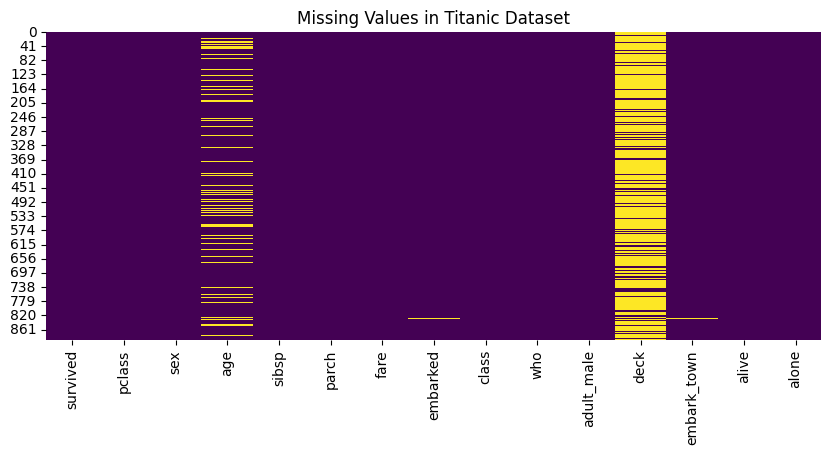

In [ ]:
# Plot missing values
plt.figure(figsize=(10,4))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

###Imputing missing values using a pipeline

### 1. **Consistency**:
   - **Single Process**: Ensures that the same imputation strategy is applied consistently across training and testing datasets, avoiding discrepancies and potential biases.
   - **Reproducibility**: Facilitates reproducibility by encapsulating all preprocessing steps, including imputation, in a single, well-defined process.

### 2. **Prevents Data Leakage**:
   - **Proper Segregation**: Prevents data leakage by ensuring that imputation is based only on the training data during cross-validation or when applying the model to new data.
   - **Isolation of Training and Testing**: Guarantees that the imputation strategy is learned from the training set and applied to both training and test sets separately, maintaining the integrity of the evaluation process.

### 3. **Efficiency**:
   - **Streamlined Workflow**: Automates the preprocessing steps, making the workflow more efficient and less error-prone.
   - **Integrated with Model Training**: Allows imputation and other preprocessing steps to be seamlessly integrated with model training and evaluation.

### 4. **Modularity and Scalability**:
   - **Modular Components**: Enables the creation of modular components that can be easily modified, extended, or replaced without disrupting the entire workflow.
   - **Scalability**: Facilitates scaling the preprocessing steps to more complex pipelines, including additional transformations or feature engineering steps.

### 5. **Ease of Use**:
   - **Simplified Code**: Reduces boilerplate code and simplifies the overall codebase, making it easier to read, maintain, and debug.
   - **Higher-level Abstraction**: Provides a higher-level abstraction that abstracts away the intricacies of handling missing values, allowing the user to focus on model development and evaluation.

### 6. **Compatibility with Model Selection Tools**:
   - **Hyperparameter Tuning**: Ensures compatibility with hyperparameter tuning tools like `GridSearchCV` and `RandomizedSearchCV`, allowing for end-to-end optimization of the entire workflow, including imputation strategies.
   - **Cross-Validation**: Facilitates the use of cross-validation techniques, ensuring that imputation is part of the cross-validation loop, leading to more reliable performance estimates.

In summary, imputing missing values within a pipeline framework provides a robust, consistent, and efficient way to handle missing data, ensuring that the preprocessing steps are seamlessly integrated with the model training and evaluation process, while also enhancing code readability and maintainability.

#Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Define numerical and categorical features
numerical_features = ['age', 'fare']
categorical_features = ['embarked', 'sex', 'pclass']

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['embarked', 'sex',
                                                   'pclass'])])),
                ('classifier', LogisticRegression())])

### Apply Pipeline

In [ ]:
# Define features and target variable
X = titanic[['age', 'fare', 'embarked', 'sex', 'pclass']]
y = titanic['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# What is Variance

**High Variance:**
- Data with high variance has a wide spread, meaning the values differ significantly from each other.
- This can include a greater diversity of examples, potentially capturing more complex patterns.
- High variance data can also include more noise, which can mislead the model and lead to overfitting.

**Low Variance:**
- Data with low variance has values that are close to the mean, showing little variability.
- This can result in a model that is too simple, potentially missing important patterns (underfitting).

### Impacts of Data Variance on Learning

1. **Model Complexity:**
   - Models trained on high variance data may become overly complex, capturing noise as if it were a signal. This leads to overfitting, where the model performs well on training data but poorly on new data.
   - Models trained on low variance data might not capture all the necessary patterns in the data, leading to underfitting, where the model performs poorly on both training and new data.

2. **Generalization:**
   - The goal of a machine learning model is to generalize well to unseen data. High variance data can help in learning a diverse set of patterns, but it's crucial to manage the noise.
   - Balancing bias and variance is key to achieving good generalization. High variance in data can lead to low bias but high variance in the model's predictions.

3. **Regularization:**
   - Techniques like L1 (Lasso) and L2 (Ridge) regularization help manage the impact of high variance data by penalizing large coefficients, thus reducing the model's complexity and preventing overfitting.

### Variance in Model Predictions

**Bias-Variance Tradeoff:**
- **Bias:** Error due to overly simplistic models. High bias can cause underfitting.
- **Variance:** Error due to models being too sensitive to training data. High variance can cause overfitting.

A balanced model should have both low bias and low variance, achieving the best possible performance on unseen data.

### Managing Variance in Practice

1. **Cross-Validation:**
   - Using techniques like k-fold cross-validation helps assess how the model generalizes to different subsets of data, providing insights into the model's variance and bias.

2. **Ensemble Methods:**
   - Techniques like bagging (e.g., Random Forests) reduce variance by averaging multiple models trained on different data subsets.
   - Boosting methods (e.g., AdaBoost, Gradient Boosting) combine weak learners to reduce bias and variance.

3. **Feature Engineering:**
   - Proper feature selection and engineering can help reduce noise and manage variance.
   - Removing irrelevant or redundant features can decrease variance and improve model performance.

### Example with the Titanic Dataset

In the context of the Titanic dataset, variance plays a role in features like age, fare, and number of siblings/spouses. Managing variance involves:

1. **Handling Missing Values:**
   - Imputing missing values with median or mean to maintain consistency.

2. **Removing Outliers:**
   - Outliers can inflate variance and need to be handled appropriately to avoid misleading the model.

3. **Feature Scaling:**
   - Standardizing features to ensure they have similar variance, which helps many machine learning algorithms perform better.

Variance in data significantly influences how machine learning models learn and generalize. Balancing variance through appropriate preprocessing, regularization, and model selection is crucial for building robust and accurate models.

### Idenitfy Outliers

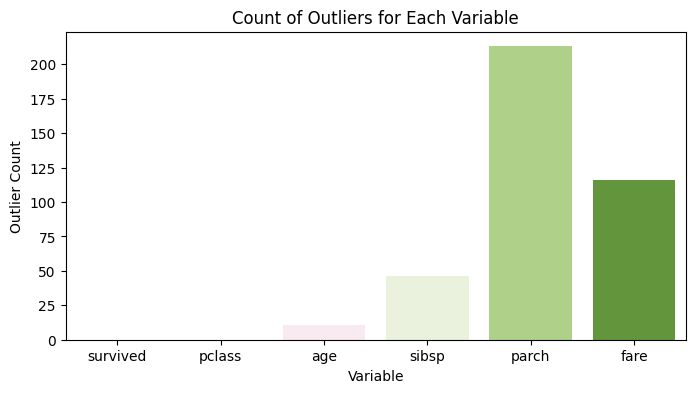

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def identify_outliers_iqr(df):
    """
    Identify outliers in a DataFrame using the IQR method and return a summary table of outlier counts.

    Parameters:
    df (pd.DataFrame): The input DataFrame with numerical columns.

    Returns:
    outliers (pd.DataFrame): A DataFrame indicating outliers (True for outliers, False otherwise).
    summary (pd.DataFrame): A summary table of the count of outliers for each variable.
    """
    outliers = pd.DataFrame(index=df.index)
    summary_data = []

    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
        outlier_count = outliers[column].sum()
        summary_data.append({'Variable': column, 'Outlier Count': outlier_count})

    summary = pd.DataFrame(summary_data)
    return outliers, summary

def plot_outlier_summary(summary):
    """
    Create a seaborn barplot to visualize the summary data of outlier counts for each variable.

    Parameters:
    summary (pd.DataFrame): The summary table of the count of outliers for each variable.
    """
    plt.figure(figsize=(8,4))
    sns.barplot(x='Variable', y='Outlier Count', data=summary, hue='Variable', palette='PiYG')
    plt.title('Count of Outliers for Each Variable')
    plt.xlabel('Variable')
    plt.ylabel('Outlier Count')
    plt.show()

# Identify outliers and get summary
outliers, summary = identify_outliers_iqr(titanic)

# Plot the summary of outliers
plot_outlier_summary(summary)


### Removing Outliers Before or Within the Pipeline

#### Pros:
1. **Consistency**: Ensures that outliers are removed once and consistently for all subsequent steps.
2. **Simplification**: Simplifies the pipeline by not having to handle outlier removal within it.
3. **Customization**: Allows for more flexible and customized outlier removal techniques that might be harder to implement within a pipeline.

#### Cons:
1. **Separate Processing**: Requires separate steps for outlier removal, which may not be as integrated into the automated workflow.
2. **Reusability**: Makes it harder to reuse the pipeline as a complete, standalone processing unit.

### Removing Outliers Inside the Pipeline

#### Pros:
1. **Integration**: Keeps all preprocessing steps, including outlier removal, within a single, cohesive pipeline, making the workflow more automated and easier to manage.
2. **Reusability**: Facilitates reusability and deployment of the entire pipeline as a single unit.
3. **Consistency**: Ensures consistent application of outlier removal during cross-validation, hyperparameter tuning, and when making predictions on new data.

#### Cons:
1. **Complexity**: Adds complexity to the pipeline, especially if the outlier removal step needs to handle both `X` and `y` consistently.
2. **Flexibility**: May limit the flexibility of using more advanced or customized outlier removal techniques.

### Best Practices

**Best practices generally favor integrating outlier removal within the pipeline** to ensure a consistent and automated workflow. Here’s how you can properly handle outlier removal within a pipeline:

1. **Custom Transformer**: Create a custom transformer for outlier removal.
2. **Ensure Consistency**: Ensure that the transformer handles `X` and `y` appropriately, maintaining consistent sample sizes.

This approach ensures that all preprocessing steps, including outlier removal, are integrated into the pipeline, making the workflow consistent, reusable, and easier to manage.

# Outlier Removal  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Custom transformer for outlier removal using IQR method
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        if y is not None:
            y = y.copy()

        for column in X.select_dtypes(include=['number']).columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.factor * IQR
            upper_bound = Q3 + self.factor * IQR
            mask = (X[column] >= lower_bound) & (X[column] <= upper_bound)
            X = X[mask]
            if y is not None:
                y = y.loc[mask]

        return X if y is None else (X, y)

# Function to split columns by type
def split_columns_by_type(df):
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return numeric_features, categorical_features

# Sample dataset
df = sns.load_dataset('titanic')

# Separate features and target variable
X = df.drop('survived', axis=1)
y = df['survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numeric_features, categorical_features = split_columns_by_type(X_train)

# Define the preprocessing pipelines for numerical and categorical data
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Define the full pipeline including outlier removal
pipeline = Pipeline(steps=[
    ('outlier_remover', OutlierRemover(factor=1.5)),
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Transform the training data to remove outliers
X_train_transformed, y_train_transformed = pipeline.named_steps['outlier_remover'].transform(X_train, y_train)

# Fit the rest of the pipeline on the transformed training data
pipeline.named_steps['preprocessor'].fit(X_train_transformed)
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train_transformed)
pipeline.named_steps['classifier'].fit(X_train_preprocessed, y_train_transformed)

# Transform the test data (note: we don't remove outliers from the test set)
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

# Predict on the test data
predictions = pipeline.named_steps['classifier'].predict(X_test_preprocessed)

# Display predictions
print("Predictions:", predictions)


Predictions: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [ ]:
# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



### Detailed Explanation

1. **Creating the Mask:**
   - In the `OutlierRemover` transformer, a mask is created based on the conditions defined by the Interquartile Range (IQR) method for each numerical column in `X`.
   - The mask is a boolean array that indicates which rows in `X` are not considered outliers.

2. **Applying the Mask to `X`:**
   - The mask is applied to `X` to filter out rows that are identified as outliers.
   - This ensures that only the non-outlier rows are retained in `X`.

3. **Applying the Same Mask to `y`:**
   - The same mask is applied to `y` to filter out the corresponding rows in the target variable.
   - This step ensures that the number of samples in `X` and `y` remains consistent after the outlier removal process.

In [ ]:
# Sample data
data = {
    'Age': [22, 25, 30, 35, 40, 150, 45, 50, 55, 60],
    'Fare': [7.25, 71.83, 8.05, 18.75, 21.0, 7.25, 71.83, 512.3292, 7.75, 29.0],
    'Survived': [0, 1, 1, 0, 0, 0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Separate features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Create a mask based on IQR for the 'Age' column
Q1 = X['Age'].quantile(0.25)
Q3 = X['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask = (X['Age'] >= lower_bound) & (X['Age'] <= upper_bound)

# Apply the mask to X
X_filtered = X[mask]

# Apply the same mask to y
y_filtered = y[mask]

print("Original X shape:", X.shape)
print("Filtered X shape:", X_filtered.shape)
print("Original y shape:", y.shape)
print("Filtered y shape:", y_filtered.shape)

Original X shape: (10, 2)
Filtered X shape: (9, 2)
Original y shape: (10,)
Filtered y shape: (9,)


### Why This Ensures Consistency

By applying the same mask to both `X` and `y`, the transformer ensures that any rows removed from `X` due to outliers are also removed from `y`. This maintains the consistency in the number of samples between the features and the target variable, which is crucial for fitting machine learning models.

### Pipeline Integration

When integrating this into a pipeline:

1. **OutlierRemover**:
   - The outlier removal step is added to the pipeline to ensure it is applied to both `X` and `y` during training.

2. **Preprocessor and Classifier**:
   - The preprocessor and classifier steps are applied after the outlier removal, ensuring that the cleaned data is used for training the model.

By following this approach, the pipeline handles outliers appropriately, ensuring consistent and robust preprocessing for both training and prediction phases.

The provided chunk of code involves a detailed and manual approach to transforming the data and fitting the model, whereas the typical pipeline steps use an integrated approach. Let's break down the differences and understand the manual approach in detail:

### Detailed Manual Approach Explanation

#### Step-by-Step Breakdown

1. **Transform the Training Data to Remove Outliers:**
   ```python
   X_train_transformed, y_train_transformed = pipeline.named_steps['outlier_remover'].transform(X_train, y_train)
   ```
   - This step explicitly calls the `transform` method of the `outlier_remover` to remove outliers from `X_train` and `y_train`. This ensures that both `X_train` and `y_train` have consistent numbers of samples after outlier removal.

2. **Fit the Preprocessor on the Transformed Training Data:**
   ```python
   pipeline.named_steps['preprocessor'].fit(X_train_transformed)
   ```
   - The preprocessor (which includes steps like imputation, scaling, encoding) is fitted on the transformed training data (`X_train_transformed`).

3. **Transform the Transformed Training Data:**
   ```python
   X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train_transformed)
   ```
   - The transformed training data is further processed by the preprocessor, resulting in `X_train_preprocessed`.

4. **Fit the Classifier on the Preprocessed Training Data:**
   ```python
   pipeline.named_steps['classifier'].fit(X_train_preprocessed, y_train_transformed)
   ```
   - The classifier (e.g., logistic regression) is fitted on the preprocessed training data and the corresponding target variable.

5. **Transform the Test Data (without Removing Outliers):**
   ```python
   X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)
   ```
   - The test data is only preprocessed (imputation, scaling, encoding) but not subjected to outlier removal. This step ensures the test data is transformed consistently with the training data preprocessing steps.

6. **Predict on the Preprocessed Test Data:**
   ```python
   predictions = pipeline.named_steps['classifier'].predict(X_test_preprocessed)
   ```
   - The classifier makes predictions on the preprocessed test data.

### Integrated Pipeline Approach Explanation

1. **Combine Preprocessing Steps:**
   ```python
   preprocessor = ColumnTransformer(
       transformers=[
           ('num', numerical_transformer, numerical_features),
           ('cat', categorical_transformer, categorical_features)
       ])
   ```

2. **Create the Pipeline:**
   ```python
   pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('classifier', RandomForestClassifier())
   ])
   ```

3. **Fit the Pipeline on the Training Data:**
   ```python
   pipeline.fit(X_train, y_train)
   ```

4. **Make Predictions:**
   ```python
   y_pred = pipeline.predict(X_test)
   ```

### Key Differences

1. **Manual Outlier Removal:**
   - In the manual approach, outlier removal is explicitly separated from the rest of the pipeline steps. This allows for direct control over how `X` and `y` are filtered, ensuring consistency in their lengths.
   - This step is critical because the outlier removal process inherently changes the number of samples in `X` and `y`.

2. **Preprocessor Fitting:**
   - The preprocessor is explicitly fitted on the transformed training data. This ensures that the preprocessing steps are correctly aligned with the data after outliers are removed.

3. **Explicit Transformation:**
   - The manual approach explicitly calls the `transform` method on both training and test data. This ensures that the same transformations are applied to both, maintaining consistency.

4. **Separate Training Steps:**
   - The classifier is explicitly trained on the preprocessed training data, ensuring that the model sees only the cleaned data.

### Why the Detailed Manual Approach Works

- **Consistency:** Ensures that `X` and `y` have the same number of samples after outlier removal.
- **Flexibility:** Allows direct control over each transformation step, making it easier to debug and understand the impact of each preprocessing step.
- **Modularity:** Each step can be individually validated, ensuring that the pipeline components work correctly together.

### When to Use Each Approach

- **Detailed Manual Approach:** Use this when you need fine-grained control over each transformation step and when dealing with transformations that inherently change the shape of your data (e.g., outlier removal).
- **Integrated Pipeline Approach:** Use this for simplicity and when transformations do not alter the number of samples (e.g., scaling, encoding).

By understanding these differences, you can choose the appropriate approach based on your specific needs and the characteristics of your dataset.

### Standard Pipeline - no Outlier Removal

### Generalized Steps

1. **Custom Transformer for Outlier Removal:**
   - This transformer does not depend on specific column names or dataset structures, so it can be reused with any dataset containing numerical columns.

2. **Function to Split Columns by Type:**
   - This function dynamically identifies numerical and categorical columns in the given DataFrame, making it adaptable to different datasets.

3. **Flexible Preprocessing Pipelines:**
   - The preprocessing steps are defined in a way that they can handle various numerical and categorical transformations, ensuring flexibility.

### Generalized Implementation

Here’s a more generalized implementation that can be applied to different datasets:

### Key Points

1. **Custom Transformer:**
   - The `OutlierRemover` class is generic and works with any dataset containing numerical columns.
   - It ensures `X` and `y` remain consistent in terms of sample numbers.

2. **Column Splitting:**
   - The `split_columns_by_type` function dynamically identifies numerical and categorical columns, making the approach adaptable to different datasets.

3. **Flexible Preprocessing Pipelines:**
   - Separate preprocessing steps for numerical and categorical features ensure the approach handles various data types effectively.

4. **Generalized Function:**
   - The `create_and_train_pipeline` function is designed to handle different datasets and target columns.
   - It follows a structured approach to split data, transform it, and fit a model while ensuring consistency in the steps.

By using this generalized approach, you can apply the pipeline to various datasets with different structures and target variables, making it highly flexible and adaptable.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Define features and target variable
X = df[['age', 'fare', 'embarked', 'sex', 'pclass']]
y = df['survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the OutlierRemover transformer
outlier_remover = OutlierRemover()

# Fit the outlier remover and transform the training data
X_train, y_train = outlier_remover.fit(X_train, y_train).transform(X_train, y_train)

# Define numerical and categorical features
numerical_features = ['age', 'fare']
categorical_features = ['embarked', 'sex', 'pclass']

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline without outlier removal (since we already applied it)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy: 0.79


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_pipelines(pipelines, X_train, X_test, y_train, y_test):
    results = []
    for name, pipeline in pipelines.items():
        # Fit the pipeline
        pipeline.fit(X_train, y_train)

        # Make predictions
        y_pred = pipeline.predict(X_test)

        # Collect metrics
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred, output_dict=True)

        # Extract F1-score (macro average)
        f1_score = class_report['macro avg']['f1-score']

        # Append results
        results.append({
            'name': name,
            'accuracy': accuracy,
            'f1_score': f1_score,
            'classification_report': class_report
        })

    return results


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define additional pipelines
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Use the same preprocessor as before
    ('classifier', RandomForestClassifier())
])

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Example usage with defined pipelines
pipelines = {
    'RandomForest': pipeline1,
    'LogisticRegression': pipeline2,
    'SVM': pipeline3
}

results = evaluate_pipelines(pipelines, X_train, X_test, y_train, y_test)

# Display the results
for result in results:
    print(f"Pipeline: {result['name']}")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"F1-Score: {result['f1_score']:.2f}")
    # print(f"Classification Report:\n {result['classification_report']}")
    print("\n")


Pipeline: RandomForest
Accuracy: 0.79
F1-Score: 0.79


Pipeline: LogisticRegression
Accuracy: 0.82
F1-Score: 0.81


Pipeline: SVM
Accuracy: 0.79
F1-Score: 0.78




## Pipeline used on different dataset

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Custom transformer for outlier removal using IQR method
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        if y is not None:
            y = y.copy()

        for column in X.select_dtypes(include=['number']).columns:
            Q1 = X[column].quantile(0.25)
            Q3 = X[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.factor * IQR
            upper_bound = Q3 + self.factor * IQR
            mask = (X[column] >= lower_bound) & (X[column] <= upper_bound)
            X = X[mask]
            if y is not None:
                y = y.loc[mask]

        return X if y is None else (X, y)

# Function to split columns by type
def split_columns_by_type(df):
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    return numeric_features, categorical_features

# General function to create and train a pipeline
def create_and_train_pipeline(df, target_column):
    # Separate features and target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Inspect unique values in the target column
    unique_classes = y.unique()
    print(f"Unique classes in target column: {unique_classes}")

    # Convert target variable to numeric
    y = y.astype('category').cat.codes  # Converts categorical labels to numerical codes (0, 1, 2, etc.)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Identify numerical and categorical columns
    numeric_features, categorical_features = split_columns_by_type(X_train)

    # Define the preprocessing pipelines for numerical and categorical data
    numeric_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', RobustScaler())
    ])

    categorical_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Combine preprocessing pipelines
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_pipeline, numeric_features),
            ('cat', categorical_pipeline, categorical_features)
        ])

    # Define the full pipeline including outlier removal
    pipeline = Pipeline(steps=[
        ('outlier_remover', OutlierRemover(factor=1.5)),
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ])

    # Transform the training data to remove outliers
    X_train_transformed, y_train_transformed = pipeline.named_steps['outlier_remover'].transform(X_train, y_train)

    # Fit the rest of the pipeline on the transformed training data
    pipeline.named_steps['preprocessor'].fit(X_train_transformed)
    X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train_transformed)
    pipeline.named_steps['classifier'].fit(X_train_preprocessed, y_train_transformed)

    # Transform the test data (note: we don't remove outliers from the test set)
    X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

    # Predict on the test data
    predictions = pipeline.named_steps['classifier'].predict(X_test_preprocessed)

    return predictions, y_test

# Load the dataset
data = fetch_openml(data_id=1590, as_frame=True, parser='auto')
df = data.frame

# Define the target column name (usually 'class' or similar for classification problems)
target_column = 'class'

# Apply the function to the dataset
predictions, y_test = create_and_train_pipeline(df, target_column)

# Display predictions
# print("Predictions:", predictions)
# Print classification report
print(classification_report(y_test, predictions))


Unique classes in target column: ['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7479
           1       0.70      0.55      0.61      2290

    accuracy                           0.84      9769
   macro avg       0.78      0.74      0.76      9769
weighted avg       0.83      0.84      0.83      9769



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
